In [1]:
# Grdaient boost with SMOTE and PCA

In [2]:
# Weather train dataset
# Column- 21
# Rows- 19,300,680 = 19 million 300 thousand 680


# Soil dataset
# Column- 32
# Rows-3109

# Test dataset
# Columns- 21
# Rows- 2,271,948 = 2 million 200 thousand 948

# Validation dataset
# Columns- 21
# Rows- 2,268,840 = 2 million 268 thousand 840

In [3]:
# Meteorological Indicators
# Indicator	Description
# 1. WS10M_MIN	Minimum Wind Speed at 10 Meters (m/s)
# 2. QV2M	Specific Humidity at 2 Meters (g/kg)
# 3. T2M_RANGE	Temperature Range at 2 Meters (C)
# 4. WS10M	Wind Speed at 10 Meters (m/s)
# 5. T2M	Temperature at 2 Meters (C)
# 6. WS50M_MIN	Minimum Wind Speed at 50 Meters (m/s)
# 7. T2M_MAX	Maximum Temperature at 2 Meters (C)
# 8. WS50M	Wind Speed at 50 Meters (m/s)
# 9. TS	Earth Skin Temperature (C)
# 10. WS50M_RANGE	Wind Speed Range at 50 Meters (m/s)
# 11. WS50M_MAX	Maximum Wind Speed at 50 Meters (m/s)
# 12. WS10M_MAX	Maximum Wind Speed at 10 Meters (m/s)
# 13. WS10M_RANGE	Wind Speed Range at 10 Meters (m/s)
# 14. PS	Surface Pressure (kPa)
# 15. T2MDEW	Dew/Frost Point at 2 Meters (C)
# 16. T2M_MIN	Minimum Temperature at 2 Meters (C)
# 17. T2MWET	Wet Bulb Temperature at 2 Meters (C)
# 18. PRECTOT	Precipitation (mm day-1)


In [4]:
#SOIL dataset


# fips
# US county FIPS code. see: https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697

# lat
# Latitude

# lon
# Longitude

# elevation
# Median elevation (meters)

# slope1
# 0 % ≤ slope ≤ 0.5 %

# slope2
# 0.5 % ≤ slope ≤ 2 %

# slope3
# 2 % ≤ slope ≤ 5 %

# slope4
# 5 % ≤ slope ≤ 10 %

# slope5
# 10 % ≤ slope ≤ 15 %

# slope6
# 15 % ≤ slope ≤ 30 %

# slope7
# 30 % ≤ slope ≤ 45 %

# slope8
# Slope > 45 %

# aspectN
# North: 0˚< aspect ≤45˚ or 315˚< aspect ≤360˚

# aspectE
# East: 45˚ < aspect ≤ 135˚

# aspectS
# South: 135˚ < aspect ≤ 225˚

# aspectW
# West: 225˚ < aspect ≤ 315˚

# aspectUnknown
# Undefined: Slope aspect undefined; this value is used for grids where slope 
# gradient is undefined or slope gradient is less than 2%.

# WAT_LAND
# mapped water bodies

# NVG_LAND
# barren/very sparsely vegetated land

# URB_LAND
# built-up land (residential and infrastructure)

# GRS_LAND
# grass/scrub/woodland

# FOR_LAND
# forest land, calibrated to FRA2000 land statistics

# CULTRF_LAND
# CULTIR_LAND
# irrigated cultivated land, according to GMIA 4.0

# CULT_LAND
# total cultivated land

# SQ1
# Nutrient availability

# SQ2
# Nutrient retention capacity

# SQ3
# Rooting conditions

# SQ4
# Oxygen availability to roots

# SQ5
# Excess salts.

# SQ6
# Toxicity

# SQ7
# Workability (constraining field management)

In [1]:
# importing packages

import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns
import umap
import sklearn
import imblearn

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
# To track runtime
start_time = time.time()

In [7]:
# importimg datasets

In [3]:
# weather training dataset

weathertrainset = pd.read_csv("train_timeseries.csv")

weathertrainset.describe()



,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
count,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,2.756796e+06
mean,3.067038e+04,2.644145e+00,9.665578e+01,7.816178e+00,1.280146e+01,6.951072e+00,6.986916e+00,1.868141e+01,7.411665e+00,1.126974e+01,1.288900e+01,3.564013e+00,5.195993e+00,1.928879e+00,3.267113e+00,5.525151e+00,7.811798e+00,3.130077e+00,4.681721e+00,8.245298e-01
std,1.497911e+04,6.226305e+00,5.447994e+00,4.694305e+00,1.092674e+01,1.014551e+01,1.009116e+01,1.154487e+01,1.057680e+01,4.005165e+00,1.114961e+01,1.862297e+00,2.627969e+00,1.351713e+00,1.947028e+00,2.321549e+00,2.861210e+00,2.122751e+00,2.171263e+00,1.223727e+00
min,1.001000e+03,0.000000e+00,6.612000e+01,1.200000e-01,-3.734000e+01,-3.770000e+01,-3.746000e+01,-3.220000e+01,-4.596000e+01,3.000000e-02,-3.823000e+01,2.500000e-01,5.400000e-01,0.000000e+00,1.600000e-01,4.000000e-01,7.000000e-01,0.000000e+00,3.200000e-01,0.000000e+00
25%,1.904450e+04,0.000000e+00,9.584000e+01,3.780000e+00,4.450000e+00,-9.600000e-01,-9.200000e-01,1.027000e+01,-7.000000e-01,8.420000e+00,4.340000e+00,2.140000e+00,3.110000e+00,9.600000e-01,1.810000e+00,3.790000e+00,5.680000e+00,1.450000e+00,3.130000e+00,0.000000e+00
50%,2.921200e+04,1.800000e-01,9.830000e+01,6.840000e+00,1.402000e+01,7.570000e+00,7.580000e+00,2.040000e+01,8.030000e+00,1.124000e+01,1.404000e+01,3.140000e+00,4.670000e+00,1.660000e+00,2.800000e+00,5.120000e+00,7.310000e+00,2.770000e+00,4.250000e+00,0.000000e+00
75%,4.600750e+04,2.160000e+00,9.996000e+01,1.135000e+01,2.188000e+01,1.552000e+01,1.552000e+01,2.787000e+01,1.614000e+01,1.408000e+01,2.207000e+01,4.600000e+00,6.750000e+00,2.580000e+00,4.250000e+00,6.880000e+00,9.460000e+00,4.410000e+00,5.770000e+00,1.189600e+00
max,5.604300e+04,2.345900e+02,1.043200e+02,2.292000e+01,4.139000e+01,2.755000e+01,2.755000e+01,4.991000e+01,3.380000e+01,3.461000e+01,4.385000e+01,2.369000e+01,3.628000e+01,1.720000e+01,2.825000e+01,2.835000e+01,4.273000e+01,2.087000e+01,3.243000e+01,5.000000e+00


In [4]:
# soil dataset

soilset = pd.read_csv("soil_data.csv")

soilset.describe()

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,...,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
count,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.00000,3109.000000,3109.000000,3109.000000,3109.000000,...,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.00000,3109.000000,3109.000000,3109.000000
mean,30678.538437,38.280052,-91.659790,427.624638,0.054973,0.29775,0.319991,0.155878,0.053409,0.065323,...,28.494804,3.504682,31.999486,1.830492,1.553554,1.282084,1.35735,1.146993,1.135092,1.284979
std,14986.018730,4.838634,11.485291,500.158880,0.089873,0.21595,0.167727,0.128400,0.073107,0.125526,...,31.839502,10.290893,33.099657,1.192219,1.021382,1.002508,1.03011,0.922308,0.914502,1.017465
min,1001.000000,25.601043,-124.211407,-1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,19045.000000,34.686818,-98.046842,132.000000,0.008300,0.10510,0.185800,0.040800,0.000500,0.000000,...,0.143526,0.045909,1.602227,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
50%,29213.000000,38.328061,-90.181170,272.000000,0.028300,0.27100,0.347100,0.127500,0.012200,0.000700,...,14.043937,0.276606,18.811279,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
75%,46009.000000,41.703590,-83.373303,483.000000,0.068500,0.47750,0.459300,0.255200,0.090300,0.054100,...,51.737080,1.370315,60.637421,3.000000,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000
max,56045.000000,48.842653,-67.609354,3561.000000,0.974000,0.75990,0.696900,0.571700,0.330000,0.606800,...,97.029572,99.956841,99.956841,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000


In [5]:
# weather test dataset

testset = pd.read_csv("test_timeseries.csv")

testset.describe()

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
count,2.271948e+06,2.271948e+06,2.271948e+06,2.271948e+06,2.271948e+06,2.271948e+06,2.271948e+06,2.271948e+06,2.271948e+06,2.271948e+06,2.271948e+06,2.271948e+06,2.271948e+06,2.271948e+06,2.271948e+06,2.271948e+06,2.271948e+06,2.271948e+06,2.271948e+06,326340.000000
mean,3.067038e+04,2.938845e+00,9.666175e+01,8.223259e+00,1.294575e+01,7.782536e+00,7.793077e+00,1.861224e+01,7.737146e+00,1.087509e+01,1.298156e+01,3.528208e+00,5.177723e+00,1.880345e+00,3.297381e+00,5.486035e+00,7.804205e+00,3.060228e+00,4.743982e+00,0.413486
std,1.497911e+04,6.719112e+00,5.443289e+00,4.925266e+00,1.085940e+01,1.033316e+01,1.010450e+01,1.140387e+01,1.063210e+01,3.850620e+00,1.106347e+01,1.834560e+00,2.618564e+00,1.310424e+00,1.971088e+00,2.291324e+00,2.869980e+00,2.071117e+00,2.202233e+00,0.838403
min,1.001000e+03,0.000000e+00,6.675000e+01,1.000000e-01,-3.857000e+01,-4.154000e+01,-3.859000e+01,-3.133000e+01,-4.546000e+01,1.200000e-01,-4.123000e+01,2.600000e-01,6.000000e-01,0.000000e+00,2.300000e-01,5.200000e-01,1.040000e+00,0.000000e+00,4.500000e-01,0.000000
25%,1.904450e+04,0.000000e+00,9.586000e+01,3.960000e+00,4.530000e+00,-1.600000e-01,-1.100000e-01,1.018000e+01,-5.000000e-01,8.140000e+00,4.410000e+00,2.120000e+00,3.110000e+00,9.400000e-01,1.820000e+00,3.790000e+00,5.670000e+00,1.410000e+00,3.160000e+00,0.000000
50%,2.921200e+04,2.100000e-01,9.830000e+01,7.060000e+00,1.389000e+01,8.250000e+00,8.090000e+00,2.014000e+01,8.080000e+00,1.078000e+01,1.388000e+01,3.140000e+00,4.680000e+00,1.620000e+00,2.820000e+00,5.100000e+00,7.310000e+00,2.720000e+00,4.300000e+00,0.000000
75%,4.600750e+04,2.540000e+00,9.996000e+01,1.222000e+01,2.223000e+01,1.685000e+01,1.671000e+01,2.787000e+01,1.680000e+01,1.353000e+01,2.236000e+01,4.540000e+00,6.710000e+00,2.530000e+00,4.300000e+00,6.820000e+00,9.450000e+00,4.320000e+00,5.860000e+00,0.406525
max,5.604300e+04,2.493400e+02,1.038800e+02,2.252000e+01,4.033000e+01,2.705000e+01,2.700000e+01,4.830000e+01,3.232000e+01,2.965000e+01,4.347000e+01,1.748000e+01,2.497000e+01,1.651000e+01,2.207000e+01,2.058000e+01,2.993000e+01,1.922000e+01,2.634000e+01,5.000000


In [6]:
# validation dataset

validationset = pd.read_csv("validation_timeseries.csv")

validationset.describe()

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
count,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,323232.000000
mean,3.067038e+04,2.945218e+00,9.668289e+01,8.209934e+00,1.313680e+01,7.626656e+00,7.631953e+00,1.884739e+01,7.903998e+00,1.094340e+01,1.321793e+01,3.533742e+00,5.165298e+00,1.904352e+00,3.260947e+00,5.486969e+00,7.762958e+00,3.104674e+00,4.658297e+00,0.538601
std,1.497911e+04,6.883588e+00,5.443892e+00,4.905189e+00,1.093575e+01,1.049740e+01,1.035683e+01,1.151619e+01,1.064708e+01,3.951253e+00,1.113432e+01,1.845010e+00,2.607319e+00,1.342821e+00,1.927159e+00,2.310433e+00,2.851491e+00,2.115034e+00,2.155684e+00,0.916711
min,1.001000e+03,0.000000e+00,6.686000e+01,1.600000e-01,-3.329000e+01,-3.701000e+01,-3.358000e+01,-2.859000e+01,-3.815000e+01,2.000000e-02,-3.548000e+01,3.700000e-01,6.000000e-01,0.000000e+00,2.200000e-01,4.600000e-01,8.700000e-01,0.000000e+00,3.000000e-01,0.000000
25%,1.904450e+04,0.000000e+00,9.588000e+01,3.920000e+00,4.670000e+00,-4.400000e-01,-4.800000e-01,1.035000e+01,-4.400000e-01,8.140000e+00,4.540000e+00,2.120000e+00,3.110000e+00,9.400000e-01,1.810000e+00,3.770000e+00,5.640000e+00,1.420000e+00,3.110000e+00,0.000000
50%,2.921200e+04,1.900000e-01,9.832000e+01,7.260000e+00,1.458000e+01,8.510000e+00,8.420000e+00,2.081000e+01,8.670000e+00,1.090000e+01,1.461000e+01,3.140000e+00,4.670000e+00,1.640000e+00,2.810000e+00,5.120000e+00,7.300000e+00,2.760000e+00,4.220000e+00,0.000000
75%,4.600750e+04,2.500000e+00,9.998000e+01,1.218000e+01,2.251000e+01,1.671000e+01,1.665000e+01,2.824000e+01,1.701000e+01,1.364000e+01,2.269000e+01,4.560000e+00,6.710000e+00,2.560000e+00,4.250000e+00,6.830000e+00,9.420000e+00,4.390000e+00,5.760000e+00,1.000000
max,5.604300e+04,2.433200e+02,1.040600e+02,2.198000e+01,4.062000e+01,2.684000e+01,2.684000e+01,5.003000e+01,3.304000e+01,3.319000e+01,4.325000e+01,2.494000e+01,3.176000e+01,1.629000e+01,2.319000e+01,2.952000e+01,3.738000e+01,2.085000e+01,2.890000e+01,5.000000


In [12]:
# data exploration and analysis

In [7]:
# Data type info
weathertrainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300680 entries, 0 to 19300679
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fips         int64  
 1   date         object 
 2   PRECTOT      float64
 3   PS           float64
 4   QV2M         float64
 5   T2M          float64
 6   T2MDEW       float64
 7   T2MWET       float64
 8   T2M_MAX      float64
 9   T2M_MIN      float64
 10  T2M_RANGE    float64
 11  TS           float64
 12  WS10M        float64
 13  WS10M_MAX    float64
 14  WS10M_MIN    float64
 15  WS10M_RANGE  float64
 16  WS50M        float64
 17  WS50M_MAX    float64
 18  WS50M_MIN    float64
 19  WS50M_RANGE  float64
 20  score        float64
dtypes: float64(19), int64(1), object(1)
memory usage: 3.0+ GB


In [8]:
# Find count of null values
weathertrainset.isnull().sum()

fips                  0
date                  0
PRECTOT               0
PS                    0
QV2M                  0
T2M                   0
T2MDEW                0
T2MWET                0
T2M_MAX               0
T2M_MIN               0
T2M_RANGE             0
TS                    0
WS10M                 0
WS10M_MAX             0
WS10M_MIN             0
WS10M_RANGE           0
WS50M                 0
WS50M_MAX             0
WS50M_MIN             0
WS50M_RANGE           0
score          16543884
dtype: int64

In [9]:
# fips: US county FIPS code, it provides us localization
# Find number of unique fips code

weathertrainset['fips'].nunique()

3108

In [16]:
#INITIAL PREPROCESSING AND REFORMATTING

In [14]:
# On NaN values: The drought scores are available every 7 days while the meteorological data points are available daily.
# so the null values in target variable score can be removed

weathertrainset = weathertrainset.dropna()
weathertrainset.isnull().sum()

fips           0
date           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
score          0
month          0
year           0
day            0
dtype: int64

In [18]:
# score attribute has 0 null values now

In [11]:
# Extracting month, year and day from date attribute

weathertrainset['month'] = pd.DatetimeIndex(weathertrainset['date']).month
weathertrainset['year'] = pd.DatetimeIndex(weathertrainset['date']).year
weathertrainset['day'] = pd.DatetimeIndex(weathertrainset['date']).day
weathertrainset.dtypes


testset['month'] = pd.DatetimeIndex(testset['date']).month
testset['year'] = pd.DatetimeIndex(testset['date']).year
testset['day'] = pd.DatetimeIndex(testset['date']).day


validationset['month'] = pd.DatetimeIndex(validationset['date']).month
validationset['year'] = pd.DatetimeIndex(validationset['date']).year
validationset['day'] = pd.DatetimeIndex(validationset['date']).day

In [12]:
# COUNT OF VALUES FOR EACH SCORE

weathertrainset['score'].round().value_counts()

score
0.0    1652230
1.0     466944
2.0     295331
3.0     196802
4.0     106265
5.0      39224
Name: count, dtype: int64

In [21]:
# ANALYSIS

In [13]:
measures_column_list = ['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE']
weather_measures = weathertrainset[['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE']]


In [15]:
soil_measures_column_list = ['lat','lon','slope1','slope2','slope3','slope4','slope5','slope6','slope7', 'slope8', 'aspectN', 'aspectE', 'aspectS', 'aspectW','aspectUnknown', 'WAT_LAND', 'NVG_LAND', 'URB_LAND', 'GRS_LAND', 'FOR_LAND','CULTRF_LAND','CULTIR_LAND', 'CULT_LAND','SQ1','SQ2','SQ3','SQ4','SQ5','SQ6','SQ7']
soil_measures = soilset[['lat','lon','slope1','slope2','slope3','slope4','slope5','slope6','slope7', 'slope8', 'aspectN', 'aspectE', 'aspectS', 'aspectW','aspectUnknown', 'WAT_LAND', 'NVG_LAND', 'URB_LAND', 'GRS_LAND', 'FOR_LAND','CULTRF_LAND','CULTIR_LAND', 'CULT_LAND','SQ1','SQ2','SQ3','SQ4','SQ5','SQ6','SQ7']]


In [24]:
#STATISTICAL ANALYSIS


#Univariate analysis


# Density Histogram

# The width of each bin represents a range of values in the data.
# The height of each bin shows the density (or frequency) of data points within that range.



# for col_name in measures_column_list:
#     plt.figure()
#     plt.hist(weather_measures[col_name], density = True)
#     x_name = col_name
#     plt.xlabel(x_name)
#     y_name = 'Density'
#     plt.ylabel(y_name)
#     plt.title('Distribution of {x_name}'.format(x_name=x_name))
    
    


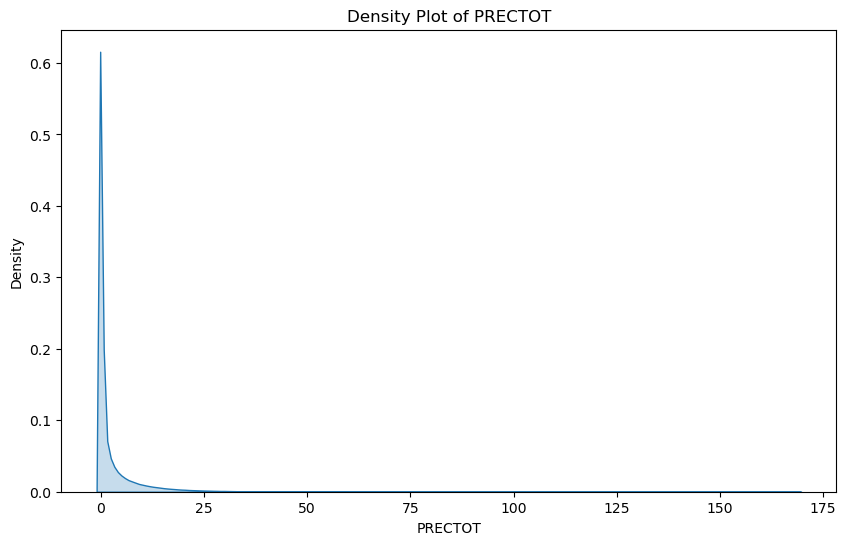

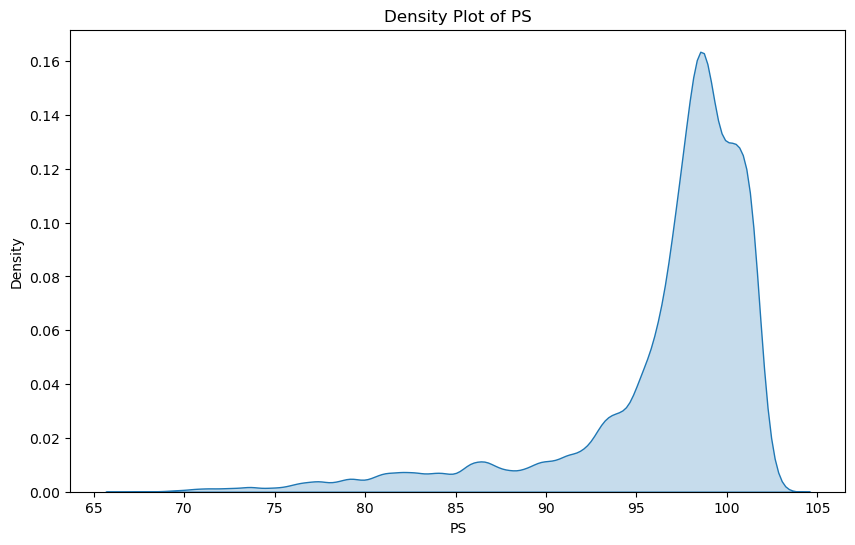

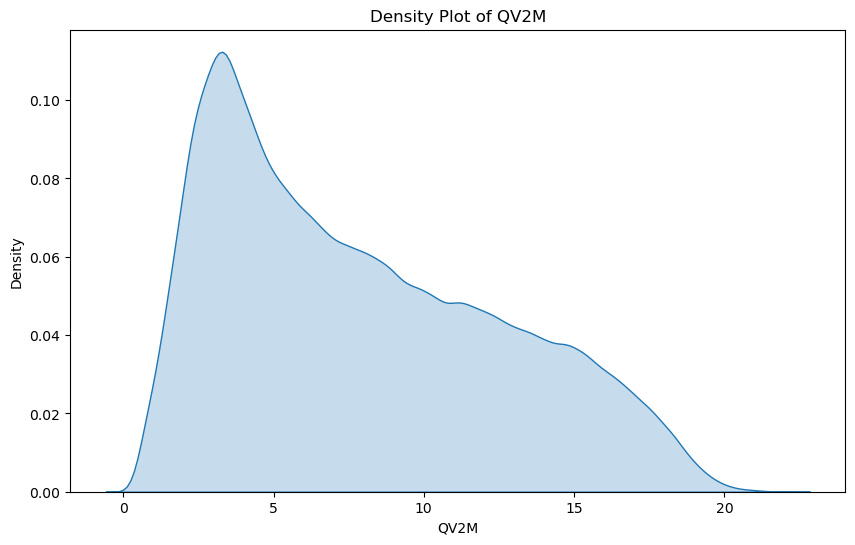

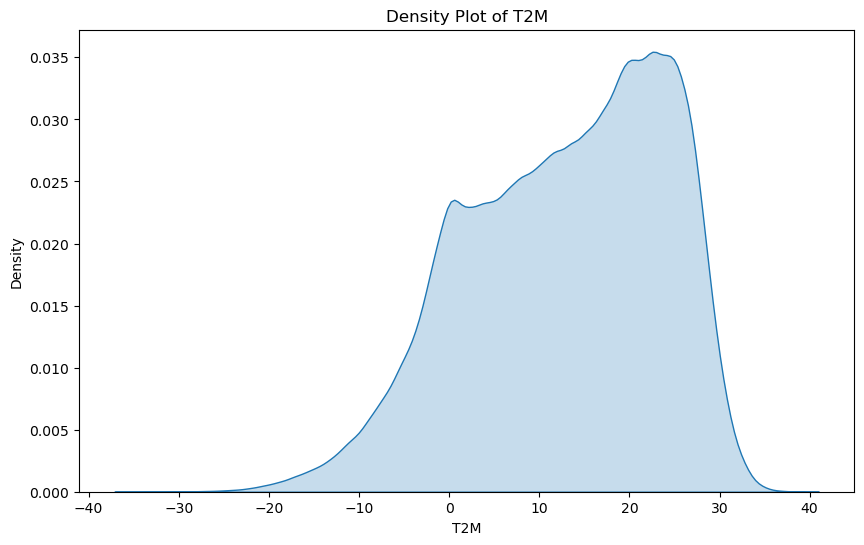

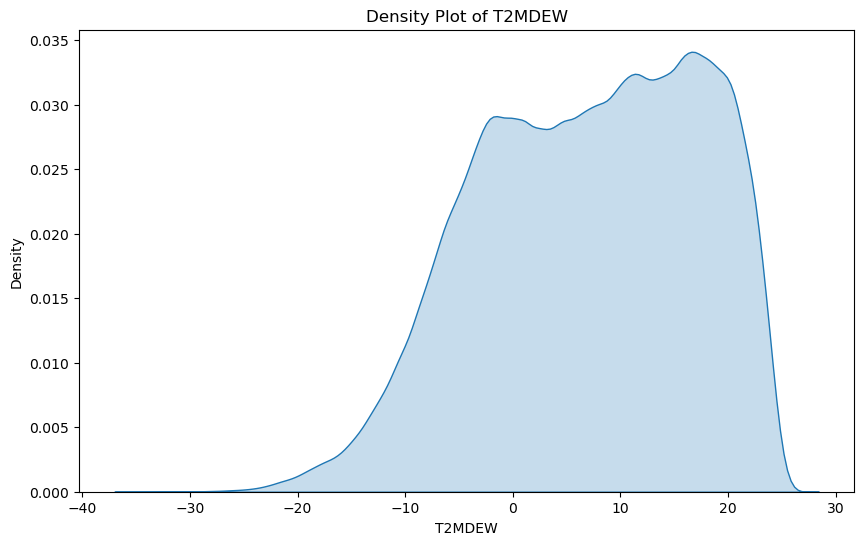

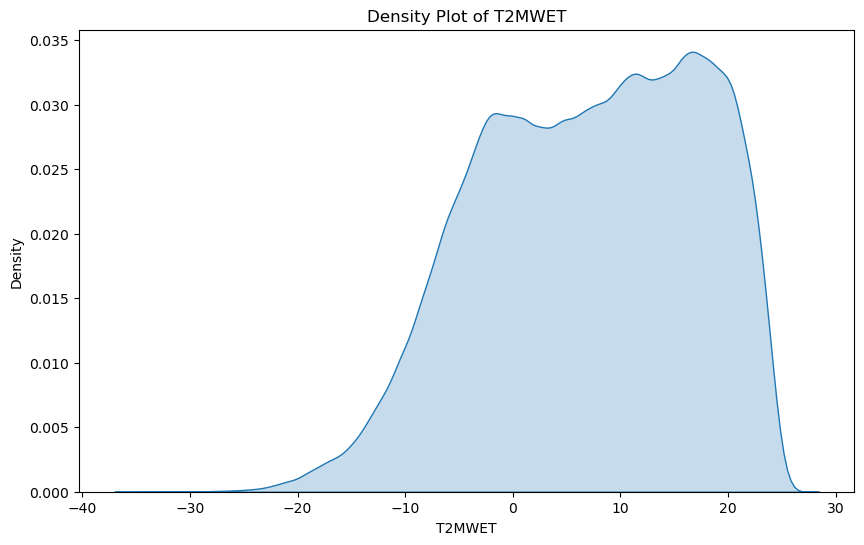

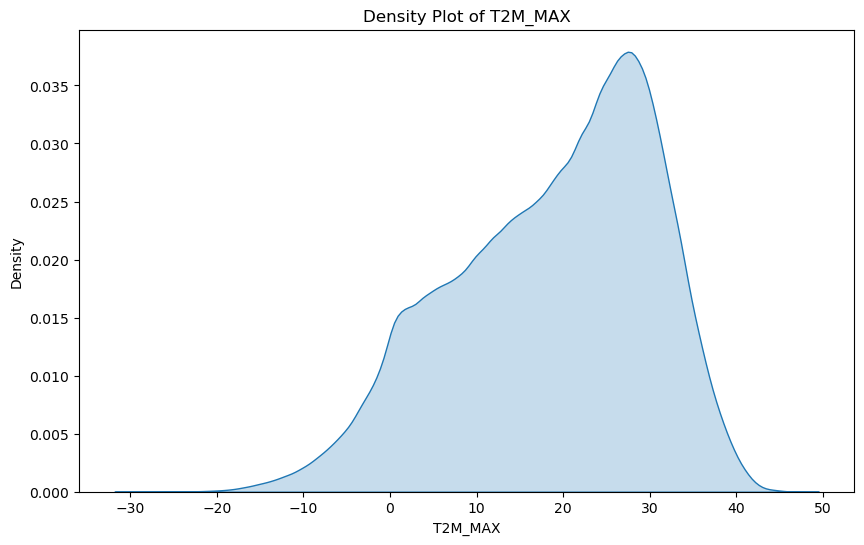

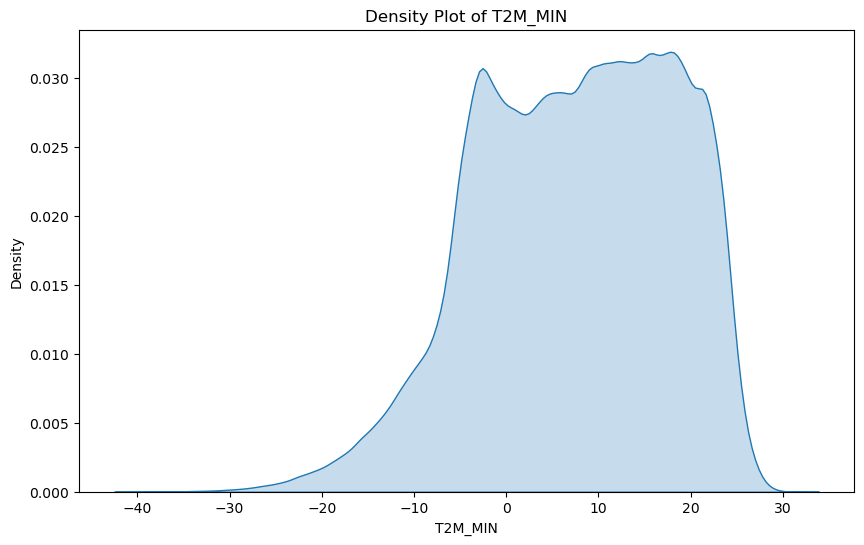

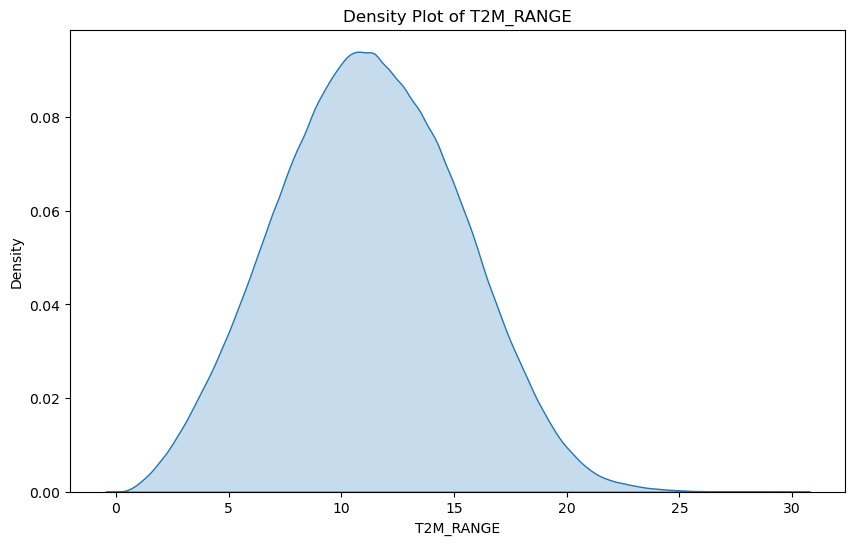

In [ ]:
# Density Plots:

# Density plots show the distribution of the data, similar to histograms but using a smooth curve.
# Offers a smooth view of the distribution, useful for understanding the overall shape of the weather data.

# Location of Peaks: The highest points on the density plot represent the most frequent values in the dataset. 
# These are known as modes.

# Single Peak: Indicates a unimodal distribution (one main peak).

# Multiple Peaks: Indicates a multimodal distribution (more than one peak), 
# which may suggest the presence of subgroups within the data.

for col_name in measures_column_list:    
    plt.figure(figsize=(10, 6))
    sns.kdeplot(weather_measures[col_name], fill=True)
    x_name = col_name
    plt.title('Density Plot of {x_name}'.format(x_name=x_name))
    plt.xlabel(x_name)
    plt.ylabel('Density')
    plt.show()

In [ ]:
#BOX PLOT ( Outlier detection)

# plt.figure(figsize=(10,40))
# for x in (range(1,19)):
#     plt.subplot(19,1,x)
#     sns.boxplot(x =  weather_measures.columns[x-1], data=weather_measures)
#     x_name = weather_measures.columns[x-1]
#     plt.title(f'Distribution of {x_name}')         
#     plt.tight_layout()





In [16]:
# OUTLIERS- values that lie beyond three standard deviations from the mean (here)
# counts no of data points for each attributes that meets conditions for outliers
# ie > or < mean+ 3*std dev for that attribute



print('Total rows = ',len(weather_measures.index))
for i in weather_measures.select_dtypes(exclude = ['object']).columns:
    print ('Number of values beyond the standard outlier limit in ', i)
    print(len(weather_measures[(weather_measures[i] > weather_measures[i].mean() + 3*weather_measures[i].std()) | (weather_measures[i] < weather_measures[i].mean() - 3*weather_measures[i].std())]))

Total rows =  2756796
Number of values beyond the standard outlier limit in  PRECTOT
65933
Number of values beyond the standard outlier limit in  PS
73197
Number of values beyond the standard outlier limit in  QV2M
1
Number of values beyond the standard outlier limit in  T2M
4531
Number of values beyond the standard outlier limit in  T2MDEW
2023
Number of values beyond the standard outlier limit in  T2MWET
1814
Number of values beyond the standard outlier limit in  T2M_MAX
3384
Number of values beyond the standard outlier limit in  T2M_MIN
6944
Number of values beyond the standard outlier limit in  T2M_RANGE
3628
Number of values beyond the standard outlier limit in  TS
4762
Number of values beyond the standard outlier limit in  WS10M
29954
Number of values beyond the standard outlier limit in  WS10M_MAX
23387
Number of values beyond the standard outlier limit in  WS10M_MIN
39901
Number of values beyond the standard outlier limit in  WS10M_RANGE
35979
Number of values beyond the standa

In [17]:
# removing outliers beyond standard limit


weathertrainset = weathertrainset[(weathertrainset['PRECTOT'] <= weathertrainset['PRECTOT'].mean() + 3*weathertrainset['PRECTOT'].std()) &
                                  (weathertrainset['PRECTOT'] >= weathertrainset['PRECTOT'].mean() - 3*weathertrainset['PRECTOT'].std())]

weathertrainset = weathertrainset[(weathertrainset['PS'] <= weathertrainset['PS'].mean() + 3*weathertrainset['PS'].std()) &
                                  (weathertrainset['PS'] >= weathertrainset['PS'].mean() - 3*weathertrainset['PS'].std())]

weathertrainset = weathertrainset[(weathertrainset['QV2M'] <= weathertrainset['QV2M'].mean() + 3*weathertrainset['QV2M'].std()) &
                                  (weathertrainset['QV2M'] >= weathertrainset['QV2M'].mean() - 3*weathertrainset['QV2M'].std())]

weathertrainset = weathertrainset[(weathertrainset['T2M'] <= weathertrainset['T2M'].mean() + 3*weathertrainset['T2M'].std()) &
                                  (weathertrainset['T2M'] >= weathertrainset['T2M'].mean() - 3*weathertrainset['T2M'].std())]

weathertrainset = weathertrainset[(weathertrainset['T2MDEW'] <= weathertrainset['T2MDEW'].mean() + 3*weathertrainset['T2MDEW'].std()) &
                                  (weathertrainset['T2MDEW'] >= weathertrainset['T2MDEW'].mean() - 3*weathertrainset['T2MDEW'].std())]

weathertrainset = weathertrainset[(weathertrainset['T2MWET'] <= weathertrainset['T2MWET'].mean() + 3*weathertrainset['T2MWET'].std()) &
                                  (weathertrainset['T2MWET'] >= weathertrainset['T2MWET'].mean() - 3*weathertrainset['T2MWET'].std())]

weathertrainset = weathertrainset[(weathertrainset['T2M_MAX'] <= weathertrainset['T2M_MAX'].mean() + 3*weathertrainset['T2M_MAX'].std()) &
                                  (weathertrainset['T2M_MAX'] >= weathertrainset['T2M_MAX'].mean() - 3*weathertrainset['T2M_MAX'].std())]

weathertrainset = weathertrainset[(weathertrainset['T2M_MIN'] <= weathertrainset['T2M_MIN'].mean() + 3*weathertrainset['T2M_MIN'].std()) &
                                  (weathertrainset['T2M_MIN'] >= weathertrainset['T2M_MIN'].mean() - 3*weathertrainset['T2M_MIN'].std())]

weathertrainset = weathertrainset[(weathertrainset['T2M_RANGE'] <= weathertrainset['T2M_RANGE'].mean() + 3*weathertrainset['T2M_RANGE'].std()) &
                                  (weathertrainset['T2M_RANGE'] >= weathertrainset['T2M_RANGE'].mean() - 3*weathertrainset['T2M_RANGE'].std())]

weathertrainset = weathertrainset[(weathertrainset['TS'] <= weathertrainset['TS'].mean() + 3*weathertrainset['TS'].std()) &
                                  (weathertrainset['TS'] >= weathertrainset['TS'].mean() - 3*weathertrainset['TS'].std())]

weathertrainset = weathertrainset[(weathertrainset['WS10M'] <= weathertrainset['WS10M'].mean() + 3*weathertrainset['WS10M'].std()) &
                                  (weathertrainset['WS10M'] >= weathertrainset['WS10M'].mean() - 3*weathertrainset['WS10M'].std())]

weathertrainset = weathertrainset[(weathertrainset['WS10M_MAX'] <= weathertrainset['WS10M_MAX'].mean() + 3*weathertrainset['WS10M_MAX'].std()) &
                                  (weathertrainset['WS10M_MAX'] >= weathertrainset['WS10M_MAX'].mean() - 3*weathertrainset['WS10M_MAX'].std())]

weathertrainset = weathertrainset[(weathertrainset['WS10M_MIN'] <= weathertrainset['WS10M_MIN'].mean() + 3*weathertrainset['WS10M_MIN'].std()) &
                                  (weathertrainset['WS10M_MIN'] >= weathertrainset['WS10M_MIN'].mean() - 3*weathertrainset['WS10M_MIN'].std())]

weathertrainset = weathertrainset[(weathertrainset['WS10M_RANGE'] <= weathertrainset['WS10M_RANGE'].mean() + 3*weathertrainset['WS10M_RANGE'].std()) &
                                  (weathertrainset['WS10M_RANGE'] >= weathertrainset['WS10M_RANGE'].mean() - 3*weathertrainset['WS10M_RANGE'].std())]

weathertrainset = weathertrainset[(weathertrainset['WS50M'] <= weathertrainset['WS50M'].mean() + 3*weathertrainset['WS50M'].std()) &
                                  (weathertrainset['WS50M'] >= weathertrainset['WS50M'].mean() - 3*weathertrainset['WS50M'].std())]

weathertrainset = weathertrainset[(weathertrainset['WS50M_MAX'] <= weathertrainset['WS50M_MAX'].mean() + 3*weathertrainset['WS50M_MAX'].std()) &
                                  (weathertrainset['WS50M_MAX'] >= weathertrainset['WS50M_MAX'].mean() - 3*weathertrainset['WS50M_MAX'].std())]

weathertrainset = weathertrainset[(weathertrainset['WS50M_MIN'] <= weathertrainset['WS50M_MIN'].mean() + 3*weathertrainset['WS50M_MIN'].std()) &
                                  (weathertrainset['WS50M_MIN'] >= weathertrainset['WS50M_MIN'].mean() - 3*weathertrainset['WS50M_MIN'].std())]

weathertrainset = weathertrainset[(weathertrainset['WS50M_RANGE'] <= weathertrainset['WS50M_RANGE'].mean() + 3*weathertrainset['WS50M_RANGE'].std()) &
                                  (weathertrainset['WS50M_RANGE'] >= weathertrainset['WS50M_RANGE'].mean() - 3*weathertrainset['WS50M_RANGE'].std())]

print('Total rows = ',len(weathertrainset.index))


Total rows =  2474338


In [18]:
#CORRELATION ANALYSIS

In [18]:
#Correlation between weather attributes

weather_correlation_matrix = weather_measures.corr()
print(weather_correlation_matrix)


weather_correlation_matrix.style.background_gradient(cmap = 'RdYlGn')


              PRECTOT        PS      QV2M       T2M    T2MDEW    T2MWET  \
PRECTOT      1.000000  0.068775  0.245081  0.093258  0.231035  0.230975   
PS           0.068775  1.000000  0.282412  0.164160  0.341234  0.341252   
QV2M         0.245081  0.282412  1.000000  0.870242  0.959385  0.960434   
T2M          0.093258  0.164160  0.870242  1.000000  0.913530  0.914218   
T2MDEW       0.231035  0.341234  0.959385  0.913530  1.000000  0.999970   
T2MWET       0.230975  0.341252  0.960434  0.914218  0.999970  1.000000   
T2M_MAX      0.026773  0.111979  0.804338  0.983356  0.854716  0.855401   
T2M_MIN      0.144929  0.208285  0.906144  0.981629  0.939934  0.940629   
T2M_RANGE   -0.304171 -0.225935 -0.071547  0.244357 -0.015643 -0.015500   
TS           0.089598  0.163830  0.862559  0.997515  0.905184  0.905911   
WS10M        0.049730 -0.080747 -0.225449 -0.207874 -0.238299 -0.237971   
WS10M_MAX    0.060981 -0.135905 -0.256452 -0.220192 -0.268686 -0.268292   
WS10M_MIN    0.023346  0.

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
PRECTOT,1.000000,0.068775,0.245081,0.093258,0.231035,0.230975,0.026773,0.144929,-0.304171,0.089598,0.049730,0.060981,0.023346,0.065755,0.069057,0.079508,0.057816,0.047477
PS,0.068775,1.000000,0.282412,0.164160,0.341234,0.341252,0.111979,0.208285,-0.225935,0.163830,-0.080747,-0.135905,0.022932,-0.198332,-0.043315,-0.091821,0.036238,-0.154479
QV2M,0.245081,0.282412,1.000000,0.870242,0.959385,0.960434,0.804338,0.906144,-0.071547,0.862559,-0.225449,-0.256452,-0.108789,-0.269203,-0.205971,-0.249961,-0.081554,-0.246203
T2M,0.093258,0.164160,0.870242,1.000000,0.913530,0.914218,0.983356,0.981629,0.244357,0.997515,-0.207874,-0.220192,-0.125407,-0.209030,-0.193196,-0.206444,-0.112579,-0.159589
T2MDEW,0.231035,0.341234,0.959385,0.913530,1.000000,0.999970,0.854716,0.939934,-0.015643,0.905184,-0.238299,-0.268686,-0.115920,-0.280702,-0.204238,-0.245323,-0.082416,-0.239335
T2MWET,0.230975,0.341252,0.960434,0.914218,0.999970,1.000000,0.855401,0.940629,-0.015500,0.905911,-0.237971,-0.268292,-0.115882,-0.280199,-0.204143,-0.245147,-0.082497,-0.239029
T2M_MAX,0.026773,0.111979,0.804338,0.983356,0.854716,0.855401,1.000000,0.937762,0.407534,0.980101,-0.216764,-0.221671,-0.141911,-0.199614,-0.195727,-0.196236,-0.133234,-0.126331
T2M_MIN,0.144929,0.208285,0.906144,0.981629,0.939934,0.940629,0.937762,1.000000,0.065037,0.979134,-0.206382,-0.225829,-0.112878,-0.225256,-0.197991,-0.225744,-0.096593,-0.200157
T2M_RANGE,-0.304171,-0.225935,-0.071547,0.244357,-0.015643,-0.015500,0.407534,0.065037,1.000000,0.241564,-0.080163,-0.043127,-0.110952,0.018746,-0.041778,0.029737,-0.128844,0.163320
TS,0.089598,0.163830,0.862559,0.997515,0.905184,0.905911,0.980101,0.979134,0.241564,1.000000,-0.189823,-0.202713,-0.110273,-0.196015,-0.180665,-0.193347,-0.102367,-0.152434


In [ ]:
# Strong correlation between weather attributes-

# 1. QV2M & T2M
# 2. QV2M & T2MDEW
# 3. QV2M & T2MWET
# 4. QV2M & T2M_MAX
# 5. QV2M & T2M_MIN
# 6. QV2M & TS
# 7. T2M & T2MDEW
# 8. T2M & T2MWET
# 9. T2M & T2M_MAX
# 10. T2M & T2M_MIN
# 11. T2M & TS
# 12. T2MDEW & T2MWET
# 13. T2MDEW & T2M_MAX
# 14. T2MDEW & T2M_MIN
# 15. T2MDEW & TS
# 16. T2MWET & T2M_MAX
# 17. T2MWET & T2M_MIN
# 18. T2MWET & TS
# 19. T2M_MAX & T2M_MIN
# 20. T2M_MAX & TS
# 21. T2M_MIN & TS
# 22. WS10M & WS10M_MAX
# 23. WS10M & WS10M_MIN
# 24. WS10M & WS10M_RANGE
# 25. WS10M & WS50M
# 26. WS10M & WS50_MAX
# 27. WS10M & WS50_MIN
# 28. WS10M_MAX & WS10M_MIN
# 29. WS10M_MAX & WS10M_RANGE
# 30. WS10M_MAX & WS50M
# 31. WS10M_MAX & WS50_MAX
# 32. WS10M_MAX & WS50_MIN
# 33. WS10M_MAX & WS50_RANGE
# 34. WS10M_MIN & WS50M
# 35. WS10M_MIN & WS50M_MAX
# 36. WS10M_MIN & WS50M_MIN
# 37. WS10M_RANGE & WS50M
# 38. WS10M_RANGE & WS50M_MAX
# 39. WS10M_RANGE & WS50M_RANGE
# 40. WS50M & WS50_MAX
# 41. WS50M & WS50M_MIN
# 42. WS50_MAX & WS50M_MIN
# 43. WS50_MAX & WS50M_RANGE


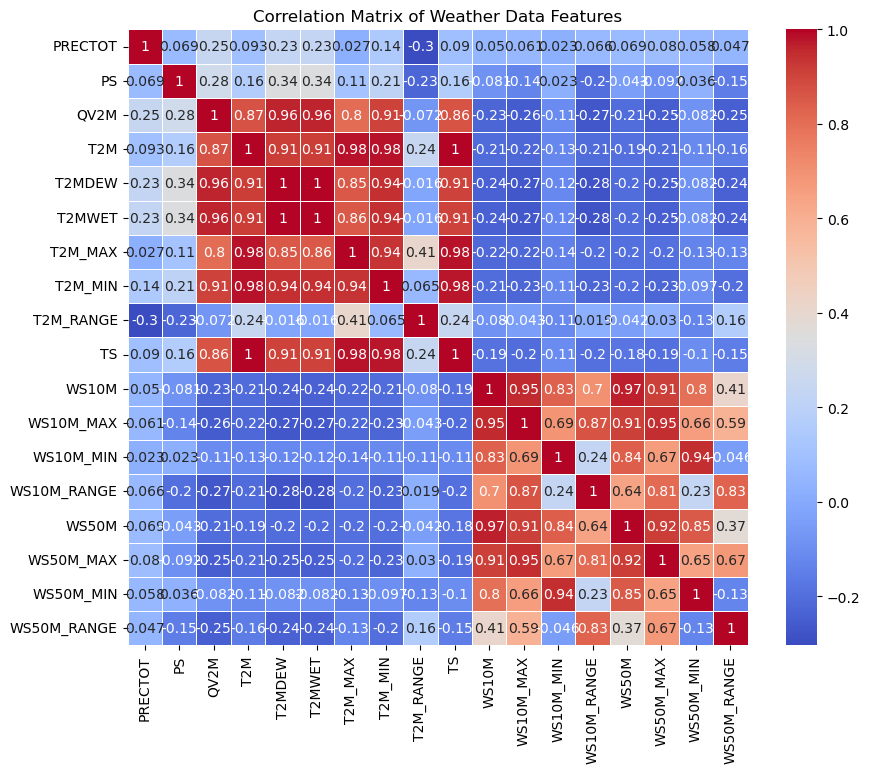

In [19]:
# Another visualisation of the correlation matrix using a heatmap for weather data
plt.figure(figsize=(10, 8))
sns.heatmap(weather_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Weather Data Features')
plt.show()


In [20]:
#Correlation between soil attributes

soil_correlation_matrix = soil_measures.corr()
print(soil_correlation_matrix)


soil_correlation_matrix.style.background_gradient(cmap = 'RdYlGn')

                    lat       lon    slope1    slope2    slope3    slope4  \
lat            1.000000 -0.191780 -0.088313 -0.105148 -0.181138  0.047746   
lon           -0.191780  1.000000  0.010025 -0.065378  0.126007  0.148091   
slope1        -0.088313  0.010025  1.000000  0.499065 -0.287921 -0.472032   
slope2        -0.105148 -0.065378  0.499065  1.000000  0.097368 -0.698141   
slope3        -0.181138  0.126007 -0.287921  0.097368  1.000000  0.197135   
slope4         0.047746  0.148091 -0.472032 -0.698141  0.197135  1.000000   
slope5         0.153122  0.028012 -0.365974 -0.699293 -0.444015  0.606168   
slope6         0.147524 -0.121056 -0.288559 -0.598646 -0.594044  0.157749   
slope7         0.135165 -0.230887 -0.201974 -0.437240 -0.513643 -0.077251   
slope8         0.134304 -0.271016 -0.121614 -0.268203 -0.336100 -0.110020   
aspectN        0.073646 -0.042761 -0.566011 -0.725276  0.090236  0.632874   
aspectE        0.067069  0.001258 -0.585208 -0.702654  0.170397  0.657072   

,lat,lon,slope1,slope2,slope3,slope4,slope5,slope6,slope7,slope8,aspectN,aspectE,aspectS,aspectW,aspectUnknown,WAT_LAND,NVG_LAND,URB_LAND,GRS_LAND,FOR_LAND,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
lat,1.000000,-0.191780,-0.088313,-0.105148,-0.181138,0.047746,0.153122,0.147524,0.135165,0.134304,0.073646,0.067069,0.023391,0.077867,-0.112585,0.078509,-0.040908,-0.000334,-0.052962,-0.120859,0.184056,-0.047166,0.162384,-0.159647,-0.062781,0.054674,-0.020927,0.081287,0.076371,0.029304
lon,-0.191780,1.000000,0.010025,-0.065378,0.126007,0.148091,0.028012,-0.121056,-0.230887,-0.271016,-0.042761,0.001258,0.050997,-0.010582,-0.048561,0.091383,-0.317266,0.148520,-0.479292,0.283082,0.098236,-0.208375,0.029711,0.371908,0.289533,-0.010185,0.113267,0.014252,0.037463,-0.001469
slope1,-0.088313,0.010025,1.000000,0.499065,-0.287921,-0.472032,-0.365974,-0.288559,-0.201974,-0.121614,-0.566011,-0.585208,-0.573076,-0.566201,0.726152,-0.019458,0.014850,-0.025368,-0.025486,-0.224590,0.203613,0.197136,0.257152,-0.154673,-0.098163,-0.088496,0.162605,-0.035740,-0.037501,-0.064636
slope2,-0.105148,-0.065378,0.499065,1.000000,0.097368,-0.698141,-0.699293,-0.598646,-0.437240,-0.268203,-0.725276,-0.702654,-0.747638,-0.710805,0.958190,-0.078235,0.051176,0.014950,0.110167,-0.509682,0.384549,0.294405,0.461441,-0.300609,-0.247439,-0.195793,0.097042,-0.095058,-0.101610,-0.163182
slope3,-0.181138,0.126007,-0.287921,0.097368,1.000000,0.197135,-0.444015,-0.594044,-0.513643,-0.336100,0.090236,0.170397,0.084352,0.109891,-0.017817,-0.161589,-0.044549,0.073788,0.066945,-0.112325,0.190478,-0.085484,0.156648,-0.017596,-0.095245,-0.217630,-0.150161,-0.140609,-0.143814,-0.225782
slope4,0.047746,0.148091,-0.472032,-0.698141,0.197135,1.000000,0.606168,0.157749,-0.077251,-0.110020,0.632874,0.657072,0.670331,0.635966,-0.709768,-0.136836,-0.042522,0.015583,-0.057273,0.370877,-0.189334,-0.194066,-0.242462,0.160659,0.066565,-0.046866,-0.240076,-0.092981,-0.090770,-0.069667
slope5,0.153122,0.028012,-0.365974,-0.699293,-0.444015,0.606168,1.000000,0.754304,0.344492,0.108520,0.596356,0.562653,0.630056,0.596563,-0.675663,-0.104040,-0.005421,-0.030669,-0.054633,0.481311,-0.340418,-0.161919,-0.377799,0.107865,0.067932,0.055413,-0.199623,-0.067937,-0.065965,0.039228
slope6,0.147524,-0.121056,-0.288559,-0.598646,-0.594044,0.157749,0.754304,1.000000,0.753072,0.360260,0.519258,0.451888,0.526893,0.499449,-0.570247,-0.087434,0.007634,-0.054176,-0.039477,0.449287,-0.340876,-0.122280,-0.365916,0.052207,0.043666,0.102628,-0.154284,-0.051485,-0.048775,0.088735
slope7,0.135165,-0.230887,-0.201974,-0.437240,-0.513643,-0.077251,0.344492,0.753072,1.000000,0.710829,0.396266,0.321173,0.370921,0.355623,-0.413598,-0.066855,0.032569,-0.061591,-0.013797,0.324937,-0.258991,-0.084315,-0.275344,0.010700,0.004682,0.128214,-0.094186,-0.022351,-0.018551,0.113770
slope8,0.134304,-0.271016,-0.121614,-0.268203,-0.336100,-0.110020,0.108520,0.360260,0.710829,1.000000,0.252071,0.209252,0.217270,0.205042,-0.252949,-0.042407,0.053877,-0.046182,-0.011248,0.206397,-0.167369,-0.057252,-0.178797,0.007381,0.009757,0.112349,-0.018649,0.028483,0.033338,0.101312


In [22]:
# DISPLAY PAIRS WITH HIGH CORRELATION


#IN WEATHER DATASET

# Set a threshold for removing correlated features
threshold = 0.9

# Identify pairs of features with high correlation
high_corr_pairs_weather = [(weather_correlation_matrix.columns[i], weather_correlation_matrix.columns[j]) 
                   for i in range(len(weather_correlation_matrix.columns)) 
                   for j in range(i) 
                   if abs(weather_correlation_matrix.iloc[i, j]) > threshold]

# Remove one feature from each pair
features_to_remove_weather = set([pair[1] for pair in high_corr_pairs_weather])
# data_reduced = data.drop(columns=features_to_remove)

print("Weather Features to be removed:", features_to_remove_weather)




#IN SOIL DATASET

# Set a threshold for removing correlated features
threshold = 0.9

# Identify pairs of features with high correlation
high_corr_pairs_soil = [(soil_correlation_matrix.columns[i], soil_correlation_matrix.columns[j]) 
                   for i in range(len(soil_correlation_matrix.columns)) 
                   for j in range(i) 
                   if abs(soil_correlation_matrix.iloc[i, j]) > threshold]

# Remove one feature from each pair
features_to_remove_soil = set([pair[1] for pair in high_corr_pairs_soil])
# data_reduced = data.drop(columns=features_to_remove)

print("\nSoil Features to be removed:", features_to_remove_soil)


Weather Features to be removed: {'T2M_MIN', 'T2M_MAX', 'QV2M', 'WS10M_MIN', 'T2MDEW', 'WS50M', 'WS10M', 'WS10M_MAX', 'T2MWET', 'T2M'}

Soil Features to be removed: {'SQ5', 'slope2', 'SQ3', 'SQ1', 'CULTRF_LAND'}


In [18]:
# merging soil and weather dataset based on column fips

train_merged_df = pd.merge(weathertrainset, soilset, on='fips')

In [19]:
# doing the same for test data and validaweathertrainsettion data and also dropping NA values


test_merged_df = pd.merge(testset, soilset, on='fips')
validation_merged_df = pd.merge(validationset, soilset, on='fips')

train_merged_df = train_merged_df.dropna()
test_merged_df = test_merged_df.dropna()
validation_merged_df = validation_merged_df.dropna()

In [20]:
train_merged_df['score'] = train_merged_df['score'].astype(int)
test_merged_df['score'] = test_merged_df['score'].astype(int)
validation_merged_df['score'] = validation_merged_df['score'].astype(int)

In [21]:


# trainset
X_train = train_merged_df.drop(columns=['score'])
y_train = train_merged_df['score']

# testset
X_test = test_merged_df.drop(columns=['score'])
y_test = test_merged_df['score']


# validation set
X_validation = validation_merged_df.drop(columns=['score'])
y_validation = validation_merged_df['score']


# # extracting day, month, year from test and validation set
# testset['month'] = pd.DatetimeIndex(testset['date']).month
# testset['year'] = pd.DatetimeIndex(testset['date']).year
# testset['day'] = pd.DatetimeIndex(testset['date']).day


# validationset['month'] = pd.DatetimeIndex(validationset['date']).month
# validationset['year'] = pd.DatetimeIndex(validationset['date']).year
# validationset['day'] = pd.DatetimeIndex(validationset['date']).day

# dropping date column
X_train = X_train.drop(columns=['date']).dropna()
X_test = X_test.drop(columns=['date']).dropna()
X_validation = X_validation.drop(columns=['date']).dropna()



In [22]:
train_merged_df.dtypes


fips               int64
date              object
PRECTOT          float64
PS               float64
QV2M             float64
T2M              float64
T2MDEW           float64
T2MWET           float64
T2M_MAX          float64
T2M_MIN          float64
T2M_RANGE        float64
TS               float64
WS10M            float64
WS10M_MAX        float64
WS10M_MIN        float64
WS10M_RANGE      float64
WS50M            float64
WS50M_MAX        float64
WS50M_MIN        float64
WS50M_RANGE      float64
score              int32
month              int32
year               int32
day                int32
lat              float64
lon              float64
elevation          int64
slope1           float64
slope2           float64
slope3           float64
slope4           float64
slope5           float64
slope6           float64
slope7           float64
slope8           float64
aspectN          float64
aspectE          float64
aspectS          float64
aspectW          float64
aspectUnknown    float64


In [23]:
test_merged_df.dtypes


fips               int64
date              object
PRECTOT          float64
PS               float64
QV2M             float64
T2M              float64
T2MDEW           float64
T2MWET           float64
T2M_MAX          float64
T2M_MIN          float64
T2M_RANGE        float64
TS               float64
WS10M            float64
WS10M_MAX        float64
WS10M_MIN        float64
WS10M_RANGE      float64
WS50M            float64
WS50M_MAX        float64
WS50M_MIN        float64
WS50M_RANGE      float64
score              int32
month              int32
year               int32
day                int32
lat              float64
lon              float64
elevation          int64
slope1           float64
slope2           float64
slope3           float64
slope4           float64
slope5           float64
slope6           float64
slope7           float64
slope8           float64
aspectN          float64
aspectE          float64
aspectS          float64
aspectW          float64
aspectUnknown    float64


In [24]:
validation_merged_df.dtypes

fips               int64
date              object
PRECTOT          float64
PS               float64
QV2M             float64
T2M              float64
T2MDEW           float64
T2MWET           float64
T2M_MAX          float64
T2M_MIN          float64
T2M_RANGE        float64
TS               float64
WS10M            float64
WS10M_MAX        float64
WS10M_MIN        float64
WS10M_RANGE      float64
WS50M            float64
WS50M_MAX        float64
WS50M_MIN        float64
WS50M_RANGE      float64
score              int32
month              int32
year               int32
day                int32
lat              float64
lon              float64
elevation          int64
slope1           float64
slope2           float64
slope3           float64
slope4           float64
slope5           float64
slope6           float64
slope7           float64
slope8           float64
aspectN          float64
aspectE          float64
aspectS          float64
aspectW          float64
aspectUnknown    float64


In [25]:
X_train.dtypes

fips               int64
PRECTOT          float64
PS               float64
QV2M             float64
T2M              float64
T2MDEW           float64
T2MWET           float64
T2M_MAX          float64
T2M_MIN          float64
T2M_RANGE        float64
TS               float64
WS10M            float64
WS10M_MAX        float64
WS10M_MIN        float64
WS10M_RANGE      float64
WS50M            float64
WS50M_MAX        float64
WS50M_MIN        float64
WS50M_RANGE      float64
month              int32
year               int32
day                int32
lat              float64
lon              float64
elevation          int64
slope1           float64
slope2           float64
slope3           float64
slope4           float64
slope5           float64
slope6           float64
slope7           float64
slope8           float64
aspectN          float64
aspectE          float64
aspectS          float64
aspectW          float64
aspectUnknown    float64
WAT_LAND         float64
NVG_LAND         float64


In [26]:
X_test.dtypes


fips               int64
PRECTOT          float64
PS               float64
QV2M             float64
T2M              float64
T2MDEW           float64
T2MWET           float64
T2M_MAX          float64
T2M_MIN          float64
T2M_RANGE        float64
TS               float64
WS10M            float64
WS10M_MAX        float64
WS10M_MIN        float64
WS10M_RANGE      float64
WS50M            float64
WS50M_MAX        float64
WS50M_MIN        float64
WS50M_RANGE      float64
month              int32
year               int32
day                int32
lat              float64
lon              float64
elevation          int64
slope1           float64
slope2           float64
slope3           float64
slope4           float64
slope5           float64
slope6           float64
slope7           float64
slope8           float64
aspectN          float64
aspectE          float64
aspectS          float64
aspectW          float64
aspectUnknown    float64
WAT_LAND         float64
NVG_LAND         float64


In [27]:
X_validation.dtypes

fips               int64
PRECTOT          float64
PS               float64
QV2M             float64
T2M              float64
T2MDEW           float64
T2MWET           float64
T2M_MAX          float64
T2M_MIN          float64
T2M_RANGE        float64
TS               float64
WS10M            float64
WS10M_MAX        float64
WS10M_MIN        float64
WS10M_RANGE      float64
WS50M            float64
WS50M_MAX        float64
WS50M_MIN        float64
WS50M_RANGE      float64
month              int32
year               int32
day                int32
lat              float64
lon              float64
elevation          int64
slope1           float64
slope2           float64
slope3           float64
slope4           float64
slope5           float64
slope6           float64
slope7           float64
slope8           float64
aspectN          float64
aspectE          float64
aspectS          float64
aspectW          float64
aspectUnknown    float64
WAT_LAND         float64
NVG_LAND         float64


In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_validation_scaled = scaler.transform(X_validation)


In [29]:
unique_before, counts_before = np.unique(y_train, return_counts=True)
print(f"Class distribution before SMOTE: {dict(zip(unique_before, counts_before))}")

Class distribution before SMOTE: {0: 1621027, 1: 376896, 2: 236203, 3: 148546, 4: 71438, 5: 20228}


In [30]:
# SMOTE (Synthetic Minority Over-sampling Technique)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [31]:
unique_after, counts_after = np.unique(y_train_resampled, return_counts=True)
print(f"Class distribution after SMOTE: {dict(zip(unique_after, counts_after))}")


Class distribution after SMOTE: {0: 1621027, 1: 1621027, 2: 1621027, 3: 1621027, 4: 1621027, 5: 1621027}


In [32]:
pca_start_time = time.time()
# Apply PCA to each

pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test_scaled)
X_validation_pca = pca.transform(X_validation_scaled)

pca_end_time = time.time()
pca_runtime = pca_end_time - pca_start_time
print("PCA time: {:.2f} seconds".format(pca_runtime))

PCA time: 61.37 seconds


In [33]:
subset_size = 19000
X_train_subset, _, y_train_subset, _ = train_test_split(X_train_pca, y_train_resampled, train_size=subset_size, random_state=42)


In [34]:
# train model
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Measure the time taken to fit the model
gdb_start_time = time.time()
model.fit(X_train_subset, y_train_subset)
gdb_end_time = time.time()

gdbruntime = gdb_end_time - gdb_start_time
print("Gradient Boost Training time: {:.2f} seconds".format(gdbruntime))


Gradient Boost Training time: 356.58 seconds


In [35]:
#evaluate training metrics

y_train_pred = model.predict(X_train_pca)
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
precision_train = precision_score(y_train_resampled, y_train_pred, average='weighted', zero_division=0)
recall_train = recall_score(y_train_resampled, y_train_pred, average='weighted',zero_division=0)
f1_train = f1_score(y_train_resampled, y_train_pred, average='weighted',zero_division=0)
conf_matrix_train = confusion_matrix(y_train_resampled, y_train_pred)
macro_recall = recall_score(y_train_resampled, y_train_pred, average='macro')
micro_recall = recall_score(y_train_resampled, y_train_pred, average='micro')
weighted_recall = recall_score(y_train_resampled, y_train_pred, average='weighted')

print(f"Training Data - Accuracy: {accuracy_train:.4f}")
print(f"Training Data - Precision: {precision_train:.4f}")
print(f"Training Data - Recall: {recall_train:.4f}")
print(f"Training Data - Macro Average Recall: {macro_recall:.4f}")
print(f"Training Data - Weighted Average Recall: {weighted_recall:.4f}")
print(f"Training Data - Micro Average Recall: {micro_recall:.4f}")
print(f"Training Data - F1-score: {f1_train:.4f}")
print(f"Training Data - Confusion Matrix:\n{conf_matrix_train}")

Training Data - Accuracy: 0.3384
Training Data - Precision: 0.3157
Training Data - Recall: 0.3384
Training Data - Macro Average Recall: 0.3384
Training Data - Weighted Average Recall: 0.3384
Training Data - Micro Average Recall: 0.3384
Training Data - F1-score: 0.3146
Training Data - Confusion Matrix:
[[ 844640  204102  168880  140563  118143  144699]
 [ 562954  233473  216041  225247  179963  203349]
 [ 390416  180702  257576  302125  225381  264827]
 [ 252146  124778  214644  415786  278939  334734]
 [ 172625   76447  126685  274673  435800  534797]
 [ 104806   37883   49900   90884  233209 1104345]]


In [36]:
# evaluate the model on the validation set

y_validation_pred = model.predict(X_validation_pca)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
precision_validation = precision_score(y_validation, y_validation_pred, average='weighted',zero_division=0)
recall_validation = recall_score(y_validation, y_validation_pred, average='weighted',zero_division=0)
f1_validation = f1_score(y_validation, y_validation_pred, average='weighted',zero_division=0)
conf_matrix_validation = confusion_matrix(y_validation, y_validation_pred)
macro_recall = recall_score(y_validation, y_validation_pred, average='macro')
micro_recall = recall_score(y_validation, y_validation_pred, average='micro')
weighted_recall = recall_score(y_validation, y_validation_pred, average='weighted')

print(f"Validation Data - Accuracy: {accuracy_validation:.4f}")
print(f"Validation Data - Precision: {precision_validation:.4f}")
print(f"Validation Data - Recall: {recall_validation:.4f}")
print(f"Validation Data - Macro Average Recall: {macro_recall:.4f}")
print(f"Validation Data - Weighted Average Recall: {weighted_recall:.4f}")
print(f"Validation Data - Micro Average Recall: {micro_recall:.4f}")
print(f"Validation Data - F1-score: {f1_validation:.4f}")
print(f"Validation Data - Confusion Matrix:\n{conf_matrix_validation}")


Validation Data - Accuracy: 0.4871
Validation Data - Precision: 0.6393
Validation Data - Recall: 0.4871
Validation Data - Macro Average Recall: 0.2560
Validation Data - Weighted Average Recall: 0.4871
Validation Data - Micro Average Recall: 0.4871
Validation Data - F1-score: 0.5504
Validation Data - Confusion Matrix:
[[147097  36263   6287   5789  27132  19575]
 [ 23552   7761   1607   1832   8502   5058]
 [  8330   3183    930   1169   4574   2839]
 [  2228   1179    582    695   2264   1784]
 [   295    256    188    335    855    784]
 [     5     36     47     49     69    101]]


In [37]:
# evaluate model on test set


# Predict on test set
y_test_pred = model.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)

# Calculate precision, recall, and F1-score (use weighted for multiclass)
precision = precision_score(y_test, y_test_pred, average='weighted',zero_division=0)
recall = recall_score(y_test, y_test_pred, average='weighted',zero_division=0)
f1 = f1_score(y_validation, y_validation_pred, average='weighted',zero_division=0)
conf_matrix = confusion_matrix(y_validation, y_validation_pred)
macro_recall = recall_score(y_test, y_test_pred, average='macro')
micro_recall = recall_score(y_test, y_test_pred, average='micro')
weighted_recall = recall_score(y_test, y_test_pred, average='weighted')


print(f"Test Data - Accuracy: {accuracy:.4f}")
print(f"Test Data - Precision: {precision:.4f}")
print(f"Test Data - Recall: {recall:.4f}")
print(f"Test Data - Macro Average Recall: {macro_recall:.4f}")
print(f"Test Data - Weighted Average Recall: {weighted_recall:.4f}")
print(f"Test Data - Micro Average Recall: {micro_recall:.4f}")
print(f"Test Data - F1-score: {f1:.4f}")
print(f"Test Data - Confusion Matrix:\n{conf_matrix}")

Test Data - Accuracy: 0.5302
Test Data - Precision: 0.7480
Test Data - Recall: 0.5302
Test Data - Macro Average Recall: 0.2370
Test Data - Weighted Average Recall: 0.5302
Test Data - Micro Average Recall: 0.5302
Test Data - F1-score: 0.5504
Test Data - Confusion Matrix:
[[147097  36263   6287   5789  27132  19575]
 [ 23552   7761   1607   1832   8502   5058]
 [  8330   3183    930   1169   4574   2839]
 [  2228   1179    582    695   2264   1784]
 [   295    256    188    335    855    784]
 [     5     36     47     49     69    101]]


In [38]:
# End the timer
end_time = time.time()

# Calculate the runtime
runtime = end_time - start_time
print(f"Total runtime: {runtime:.2f} seconds")

Total runtime: 3116.53 seconds
